## Two-dimensional diffusion equation
This code was developed by Yamanaka research group of Tokyo University of Agriculture and Technology.

## Problem
Let us consider an A-B binary system, where A is a solvent atom and B is a solute atom. Then, the concentration of B atom is denoted by $c(r, t)$ and its diffusion coefficient is denoted by $D$. 
Here, $r$ denotes a two-dimensional coordinate: $r = (x, y)$. $t$ represents time.  

## Diffusion equation
This notebook shows a Python code solving a two-dimensional diffusion simulation given as:
$$
\frac{\partial c}{\partial t} = -Div \boldsymbol{J} = -\nabla \cdot \boldsymbol{J} = \nabla \cdot \left(D \nabla c\right)
$$
where $\boldsymbol{J} = -D \nabla c$ is a diffusion flux of the concentration which is derived by the Fick's first law. 
When the diffusion coefficient $D$ is constant, the diffusion equation can be written as: 
$$
\frac{\partial c}{\partial t} = D \nabla^{2} c = D \left( \frac{\partial^{2} c}{\partial x^{2}} + \frac{\partial^{2} c}{\partial y^{2}} \right)
$$

## Finite difference method
The diffusion equation is numerically solved by finite difference method. In this code, let us consider two-dimensional regular finite difference grids with a constant spacing of the grids: $\Delta x = \Delta y$.

The time integration for the left-hand side of the diffusion equation is calculated by the forward Euler method: 
$$
\frac{\partial c}{\partial t} \simeq \frac{c_{[i,j]}^{n+1} - c_{[i,j]}^{n}}{\Delta t}
$$
where $c_{[i,j]}^{n}$ denotes the concentation $c$ at a finite difference grid $[i, j]$ and time $t = n\Delta t$. $\Delta t$ is a time increment. 

The second derivative of the concentration $c$ with respect to $x$ and $y$ for the right-hand side of the diffusion equation is calculated by the 2nd-order central finite difference method: 
$$
\frac{\partial^{2} c}{\partial x^{2}} \simeq \frac{c_{[i+1,j]}^{n} - 2c_{[i,j]}^{n} +c_{[i-1,j]}^{n}}{(\Delta x)^{2}}
$$
$$
\frac{\partial^{2} c}{\partial y^{2}} \simeq \frac{c_{[i,j+1]}^{n} - 2c_{[i,j]}^{n} +c_{[i,j-1]}^{n}}{(\Delta y)^{2}}
$$

Substituting the above equations into the diffusion equation, the discretized diffusion equation is given as: 
$$
c_{[i,j]}^{n+1} = c_{[i,j]}^{n} + D\left[ \frac{c_{[i+1,j]}^{n} - 2c_{[i,j]}^{n} +c_{[i-1,j]}^{n}}{(\Delta x)^{2}} + \frac{c_{[i,j+1]}^{n} - 2c_{[i,j]}^{n} +c_{[i,j-1]}^{n}}{(\Delta y)^{2}} \right] \Delta t
$$

## Programming 

### Step 1. Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

### Step 2. Setting of parameters and physical values

In [2]:
nx, ny = 128, 128 # number of computational grids along x and y directions
dx = dy = 0.5 # spacing of finite difference grids [m]
D = 0.3 # diffusion coefficient [m2/s]
nsteps = 1000 # number of time steps
dt = dx*dx*dy*dy/(2*D*(dx*dx+dy*dy))*0.5 # time increment for 1 time step
c0 = 1.0 # initial concentration in a high concentration region

### Step 3. Declaration of Numpy arrays for concentration-field 

In [3]:
c = np.zeros((nx, ny)) # array for a concentration-fieldat time t 
c_new = np.zeros((nx, ny)) # array for a concentration-fieldat time t+dt

### Step 4. Definition of a function for solving the discretized diffusion equation
In this code, the zero-Neumann boundary condition which assumes zero-gradient of the concentration at the boundary of computational domain is used. 

In [4]:
def calc_diffusion(c, c_new):
    for j in range(ny):
        for i in range(nx):
            ip = i + 1
            im = i - 1
            jp = j + 1
            jm = j - 1
            if ip > nx - 1: 
                ip = nx - 1
            if im < 0:
                im = 0
            if jp > ny - 1:
                jp = ny - 1
            if jm < 0:
                jm = 0 
            c_new[i,j] = c[i,j] + D*dt*(c[ip,j] + c[im,j] +  c[i,jp]  + c[i,jm] - 4*c[i,j])/dx/dx

    c[:,:] = c_new[:,:]

### Step 5. Setting of the initial concentration-field

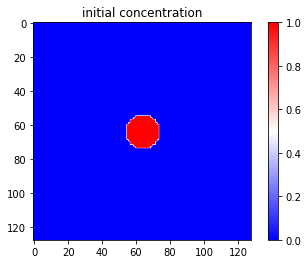

In [5]:
r = 5.0 # radius of the high-concentration region
x0 = nx/2 # central potition of the high-concentration region
y0 = ny/2

for i in range(nx):
    for j in range(ny):
        r2 = (i*dx-x0*dx)**2 + (j*dy-y0*dx)**2
        if r2 < r**2:
            c[i,j] = c0

plt.imshow(c, cmap='bwr')
plt.title('initial concentration')
plt.colorbar()
plt.show() 

### Step 6. Time integration of diffusion equation

nstep =  0 time =  0.0


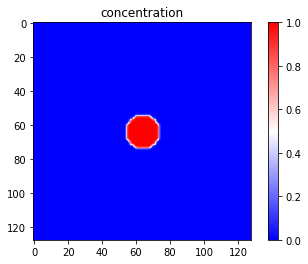

nstep =  100 time =  10.416666666666668


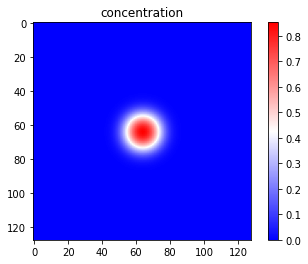

nstep =  200 time =  20.833333333333336


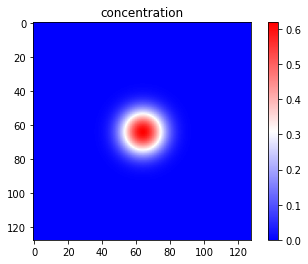

nstep =  300 time =  31.25


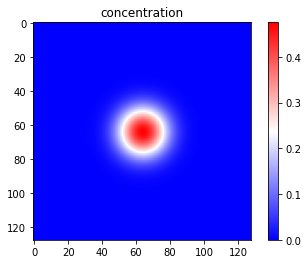

nstep =  400 time =  41.66666666666667


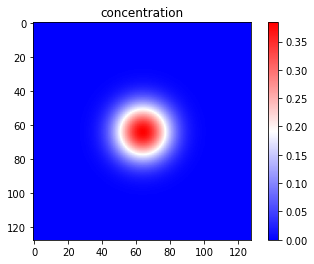

nstep =  500 time =  52.083333333333336


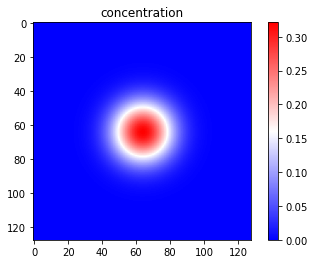

nstep =  600 time =  62.5


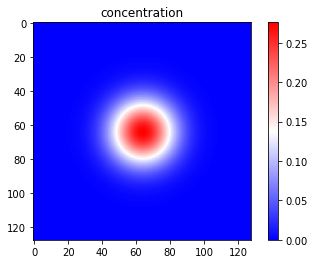

nstep =  700 time =  72.91666666666667


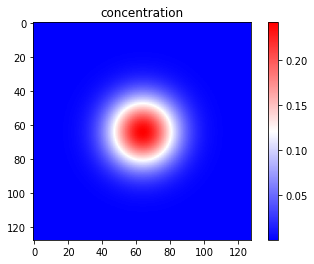

nstep =  800 time =  83.33333333333334


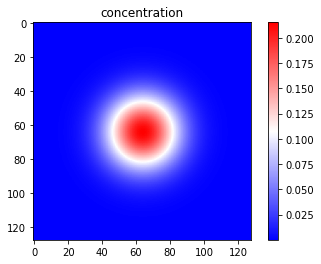

nstep =  900 time =  93.75


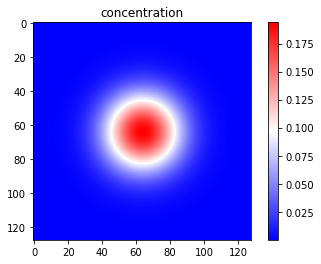

nstep =  1000 time =  104.16666666666667


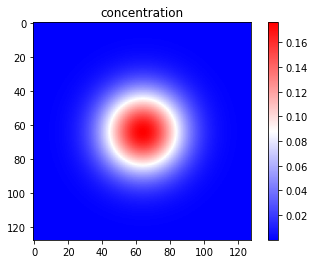

Time for 1000 time steps = 47869.08411979675 ms


In [6]:
start = time()
for nstep in range(nsteps+1):
    calc_diffusion(c,c_new)

    if nstep % 100 == 0:
        print('nstep = ', nstep, 'time = ', nstep*dt)
        plt.imshow(c, cmap='bwr')
        plt.title('concentration')
        plt.colorbar()
        plt.show() 

end = time()
print("Time for 1000 time steps =", (end-start)*1000.0, "ms")